# exp-101 Test new lmoments

In [1]:
import numpy as np
import lmoments3 as lm
from lmoments3 import distr
import rvlib as rl
from utils import unif_rand, draw_bs_sample

from sam_lm import lmom_ratios
from gum_dist import gum_lmom_fit, gum_ppf_pval, gum_rvs, gum_ppf, gum_bs_reps_ci

from gev_dist import gev_lmom_fit, gev_ppf_pval, gev_rvs, gev_ppf, gev_bs_reps_ci

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = [2.0, 3.0, 4.0, 2.4, 5.5, 1.2, 5.4, 2.2, 7.1, 1.3, 1.5, 12.1, 9.8, 15.3]

In [3]:
avis  = np.array([2, 3, 5, 10, 15, 20, 50, 100, 200, 300, 500, 1000, 10000])
probs = 1.0 - 1.0/avis

draw_bs_sample(data)

## lmom_ratios

#%%timeit
lm.lmom_ratios(data, nmom=5)

#%%timeit
lmom_ratios(np.array(data), nmom=5)

lmom_ratios_depricated(np.array(data), nmom=5)

## Gumble fit

In [4]:
#%%timeit
gum_loc, gum_scale =  gum_lmom_fit(np.array(data))
gum_ppf(probs, gum_loc, gum_scale)

array([ 4.46677399,  6.33272649,  8.41099507, 11.02241263, 12.49575235,
       13.52734705, 16.76972771, 19.19943574, 21.62027818, 23.03416919,
       24.8141201 , 27.22795014, 35.24229942])

In [5]:
#%%timeit
xgum_para = distr.gum.lmom_fit(data)
gum_fitted = distr.gum(**xgum_para)
gum_fitted.ppf(probs)

array([ 4.46677399,  6.33272649,  8.41099507, 11.02241263, 12.49575235,
       13.52734705, 16.76972771, 19.19943574, 21.62027818, 23.03416919,
       24.8141201 , 27.22795014, 35.24229942])

In [6]:
gum_fitted.rvs(100)

array([ 4.09401501e+00,  5.73924527e+00,  4.46978830e+00,  1.28504982e+01,
        1.09248563e+01,  7.78122306e+00,  2.99293348e+00, -2.10201490e+00,
        9.45084618e+00,  1.75835530e+00,  1.53104957e-02,  3.02046395e+00,
        1.04495272e+01,  9.94682905e+00,  8.22285848e+00,  1.20879419e+01,
        6.16861689e+00,  2.83985693e+00,  8.32396234e+00, -1.17431779e+00,
        2.11611784e+00,  1.07244260e+01, -2.04306617e-01,  2.06570985e+00,
        2.34100903e+01,  2.23265458e+00,  1.87956484e+00,  1.39680943e+01,
        1.10759296e+00, -3.81710211e-01,  3.80015304e+00,  3.10349957e-01,
        2.64431285e+00,  1.77433380e+00,  1.75510239e+00,  7.27924325e+00,
        7.22057219e+00,  6.89307915e+00, -1.33964886e-01,  2.33156528e+00,
        6.91824974e+00,  4.99285033e+00,  3.56268476e+00, -2.93733766e-01,
        3.16290140e+00,  5.26265494e+00, -1.92020488e+00,  1.54108844e+00,
        7.43197880e+00,  5.65168374e+00,  6.26938892e+00,  9.02981697e+00,
        4.12761121e+00, -

In [7]:
#%%timeit
rl.set_seed(123, 123)
gum_bs_reps_ci(np.array(data), probs, alpha=0.1, size=100)

array([[ 2.72922042,  5.22290243],
       [ 3.53116938,  6.83312108],
       [ 4.53250287,  8.69551505],
       [ 5.87062523, 11.27954621],
       [ 6.63498314, 12.77834791],
       [ 7.17016695, 13.82636823],
       [ 8.67487773, 16.9829209 ],
       [ 9.79553213, 19.39096445],
       [10.91209746, 21.74716967],
       [11.58093674, 23.05675803],
       [12.43071181, 24.70540208],
       [13.54819415, 26.94116405],
       [17.25843624, 34.46350318]])

## Gev fit

In [8]:
#%%timeit
xx_para = distr.gev.lmom_fit(data)
fitted = distr.gev(**xx_para)
fitted.ppf(probs)

array([  3.75411355,   5.33042265,   7.40372276,  10.5798583 ,
        12.70511466,  14.35811677,  20.59518951,  26.52148273,
        33.76372134,  38.72893202,  45.8816783 ,  57.46377937,
       118.14703654])

In [9]:
#%%timeit
gev_u, gev_loc, gev_scale = gev_lmom_fit(np.array(data))
gev_ppf(probs, gev_u,  gev_loc,  gev_scale)

array([  3.75411355,   5.33042265,   7.40372276,  10.5798583 ,
        12.70511466,  14.35811676,  20.5951895 ,  26.52148273,
        33.76372133,  38.72893201,  45.88167829,  57.46377937,
       118.14703653])

In [10]:
#%%timeit
rl.set_seed(123, 123)
gev_bs_reps_ci(np.array(data), probs, alpha=0.1, size=500)

array([[  2.2644546 ,   5.13319422],
       [  2.95559272,   6.92031807],
       [  3.86094755,   8.90802958],
       [  5.49362441,  11.351051  ],
       [  6.44111061,  12.87581347],
       [  7.13073574,  14.07706015],
       [  9.07213417,  18.52818174],
       [ 10.41804548,  23.99159387],
       [ 11.55995183,  32.09163875],
       [ 12.50422006,  38.48377696],
       [ 13.38714151,  48.37387024],
       [ 14.47693695,  67.53077653],
       [ 16.88037542, 203.57225214]])

## RVS

np.round(draw_bs_sample(data), 3)

idxs = np.round(unif_rand(0, len(data), size=len(data))).astype(int)
size = len(data)
out_array = np.empty((size))

idxs = unif_rand(0, size-1, size=size).astype(np.int_)
for idx in np.arange(size):
    out_array[idx] = data[idxs[idx]]
    
out_array

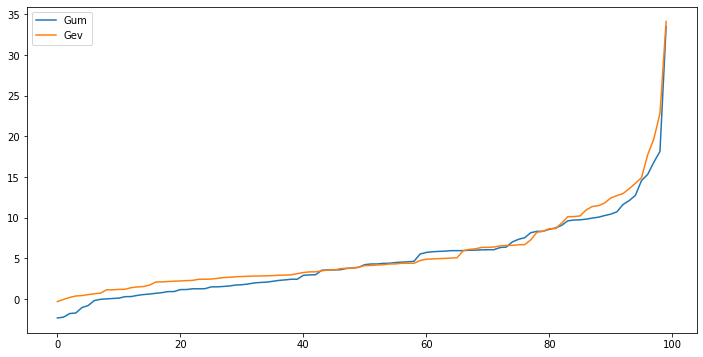

In [11]:
#%%timeit 
rl.set_seed(123, 123)
ex_gev = gev_rvs(gev_u, gev_loc, gev_scale, 100)
ex_gum = gum_rvs(gum_loc, gum_scale, 100)

fig = plt.figure(figsize=(12, 6))
ax = fig.subplots(1)
ax.plot(np.sort(ex_gum), label='Gum')
ax.plot(np.sort(ex_gev), label='Gev')
ax.legend()

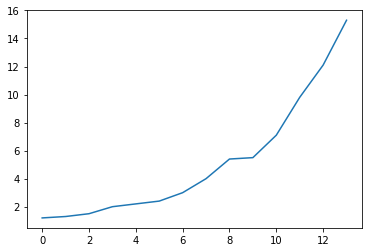

In [12]:
plt.plot(np.sort(data))